<a href="https://colab.research.google.com/github/divyadavane/CSL405_11/blob/main/DS_DL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
import pandas as pd

# Upload file
uploaded = files.upload()

# Read the uploaded CSV file
# This assumes your file is named something like 'My Uber Drives - 2016.csv'
df = pd.read_csv(next(iter(uploaded)))

# Show the first few rows
df.head()


Saving My Uber Drives - 2016.csv to My Uber Drives - 2016.csv


,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


# DATA CLEANING

In [4]:
df = pd.read_csv('My Uber Drives - 2016.csv')


In [5]:
# Clean column names
df.columns = df.columns.str.replace("*", "", regex=False).str.strip().str.lower()


In [9]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

In [10]:
df = df.dropna(subset=['start', 'category', 'start_date', 'end_date'])

In [11]:
df['purpose'] = df['purpose'].fillna('Unknown')


In [12]:
df['month'] = df['start_date'].dt.month_name()
df['weekday'] = df['start_date'].dt.day_name()
df['hour'] = df['start_date'].dt.hour
df['duration_min'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60

In [13]:
df.head()

,start_date,end_date,category,start,stop,miles,purpose,month,weekday,hour,duration_min
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,January,Friday,21,6.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,Unknown,January,Saturday,1,12.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,January,Saturday,20,13.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,January,Tuesday,17,14.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,January,Wednesday,14,67.0


## DATA VISUALIZATION

/tmp/ipython-input-15-1025102166.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='category', palette='pastel')
/tmp/ipython-input-15-1025102166.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weekday',
/tmp/ipython-input-15-1025102166.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='purpose', y='miles', palette='Set2')
/tmp/ipython-input-15-1025102166.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `

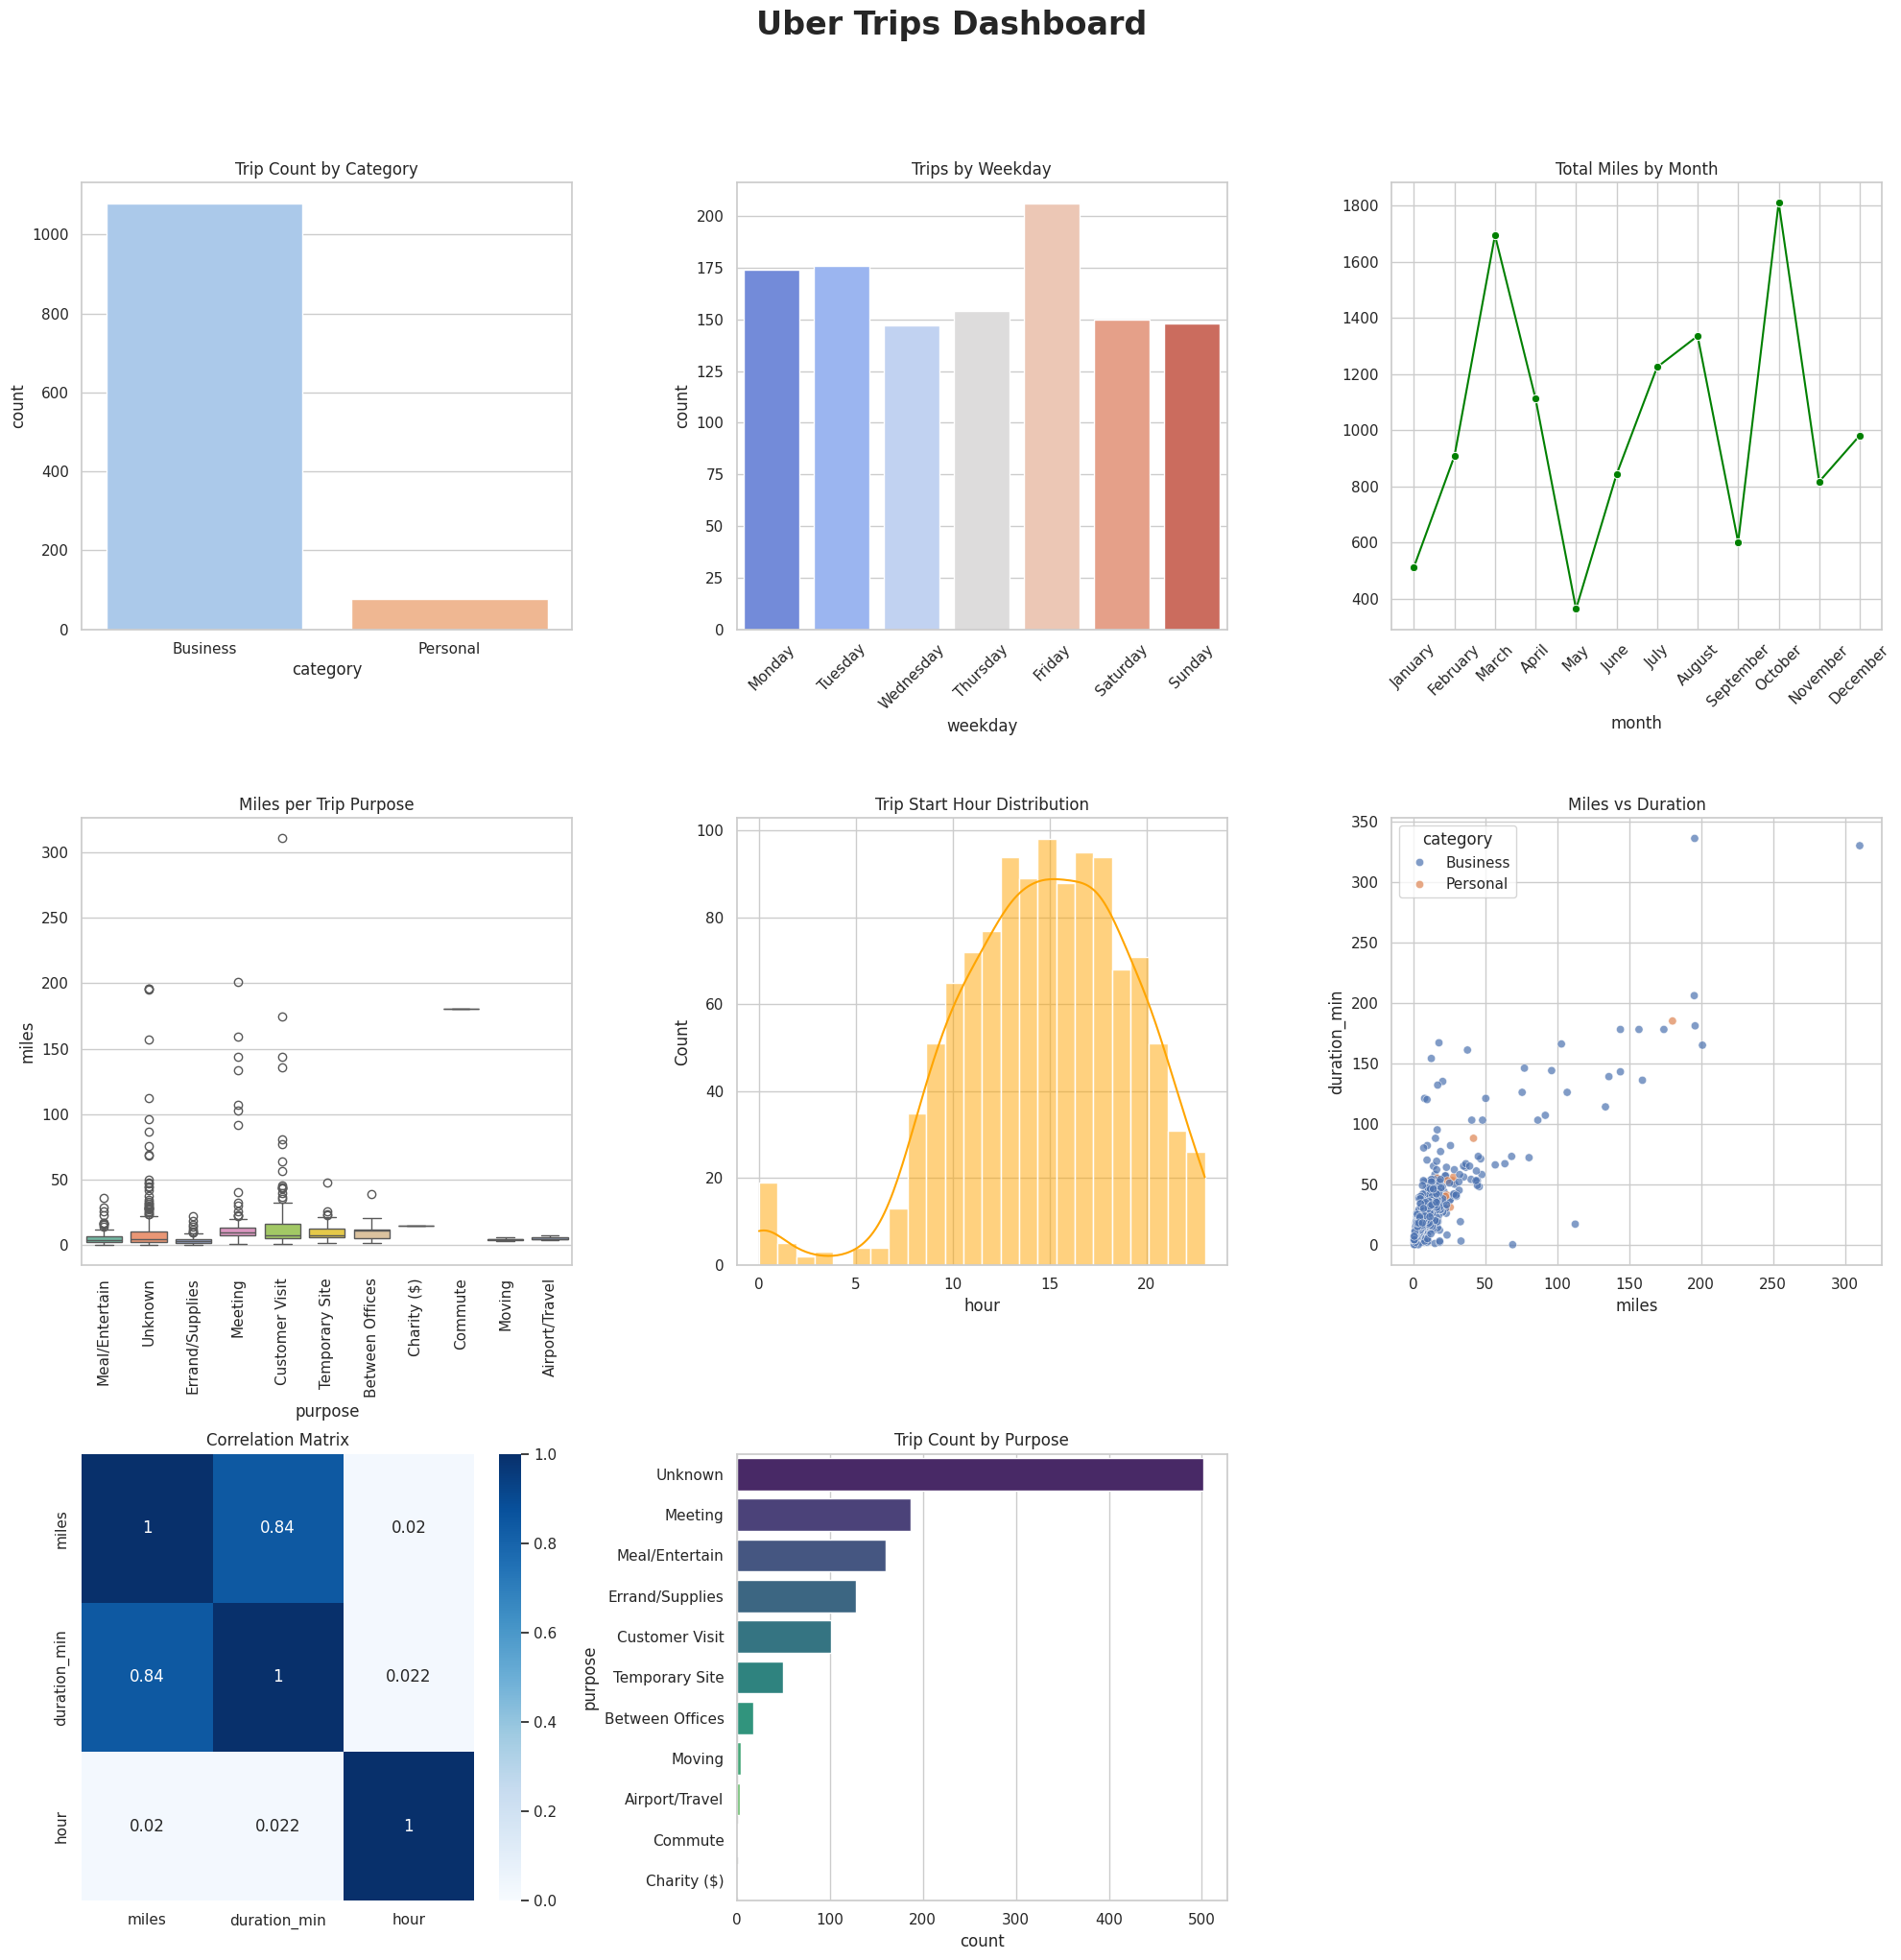

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Dashboard Styling
sns.set_style("whitegrid")
plt.figure(figsize=(20, 20))
plt.suptitle("Uber Trips Dashboard", fontsize=24, fontweight='bold', y=1.02)

# 1. Trip Category Count
plt.subplot(3, 3, 1)
sns.countplot(data=df, x='category', palette='pastel')
plt.title('Trip Count by Category')

# 2. Trips by Weekday
plt.subplot(3, 3, 2)
sns.countplot(data=df, x='weekday',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
              palette='coolwarm')
plt.title('Trips by Weekday')
plt.xticks(rotation=45)

# 3. Monthly Miles
plt.subplot(3, 3, 3)
monthly_miles = df.groupby('month')['miles'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
])
sns.lineplot(x=monthly_miles.index, y=monthly_miles.values, marker='o', color='green')
plt.title('Total Miles by Month')
plt.xticks(rotation=45)

# 4. Miles by Purpose
plt.subplot(3, 3, 4)
sns.boxplot(data=df, x='purpose', y='miles', palette='Set2')
plt.title('Miles per Trip Purpose')
plt.xticks(rotation=90)

# 5. Start Time Distribution
plt.subplot(3, 3, 5)
sns.histplot(df['hour'], bins=24, kde=True, color='orange')
plt.title('Trip Start Hour Distribution')

# 6. Miles vs Duration
plt.subplot(3, 3, 6)
sns.scatterplot(data=df, x='miles', y='duration_min', hue='category', alpha=0.7)
plt.title('Miles vs Duration')

# 7. Correlation Heatmap
plt.subplot(3, 3, 7)
corr = df[['miles', 'duration_min', 'hour']].corr()
sns.heatmap(corr, annot=True, cmap='Blues', vmin=0)
plt.title('Correlation Matrix')

# 8. Trips by Purpose (Count)
plt.subplot(3, 3, 8)
purpose_order = df['purpose'].value_counts().index
sns.countplot(data=df, y='purpose', order=purpose_order, palette='viridis')
plt.title('Trip Count by Purpose')

# Final Layout
plt.tight_layout()
plt.subplots_adjust(top=0.93)
plt.show()


# BUSINESS PREDICTION

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

In [22]:
from google.colab import files
uploaded = files.upload()


Saving My Uber Drives - 2016.csv to My Uber Drives - 2016 (1).csv


In [23]:
df = pd.read_csv(next(iter(uploaded)))

In [24]:
df.columns = df.columns.str.replace("*", "", regex=False).str.strip().str.lower()

In [25]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors='coerce')

# Drop rows with critical missing values
df = df.dropna(subset=['start', 'category', 'start_date', 'end_date'])

# Feature engineering
df['purpose'] = df['purpose'].fillna('Unknown')
df['month'] = df['start_date'].dt.month_name()
df['weekday'] = df['start_date'].dt.day_name()
df['hour'] = df['start_date'].dt.hour
df['duration_min'] = (df['end_date'] - df['start_date']).dt.total_seconds() / 60

# Encode categorical weekday
le = LabelEncoder()
df['weekday'] = le.fit_transform(df['weekday'])

# STEP 4: Define Features and Target
X = df[['hour', 'weekday', 'miles', 'duration_min']]
y = df['category']

# STEP 5: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# STEP 6: Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# STEP 7: Predict and Evaluate
y_pred = model.predict(X_test)
print("📊 Classification Report:")
print(classification_report(y_test, y_pred))

📊 Classification Report:
              precision    recall  f1-score   support

    Business       0.93      1.00      0.96       216
    Personal       0.00      0.00      0.00        15

    accuracy                           0.93       231
   macro avg       0.47      0.50      0.48       231
weighted avg       0.87      0.93      0.90       231

